## Create 1000 version of the ring graphs
- the base ring graph consists of 3 figures (bell, star and tree) which are each repeated 10 times and added to a ring at every 5 modes.
- The base is sampled for 10 values of fraction changes and 10 values of delta values. For every value 10 graphs are created with a different seed.

In [1]:
from graphcase_experiments.tools.graph_sampler import create_sampled_ring_graphs
create_sampled_ring_graphs()

## execute a grid search for the graphcase algo
the hypertuning for the graphcase algo is done once using the graph with fraction = 0.6 and delta=0.6


/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


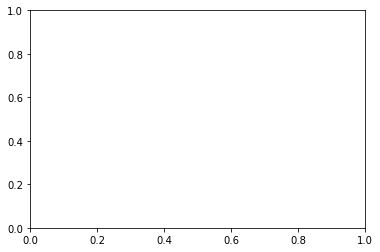

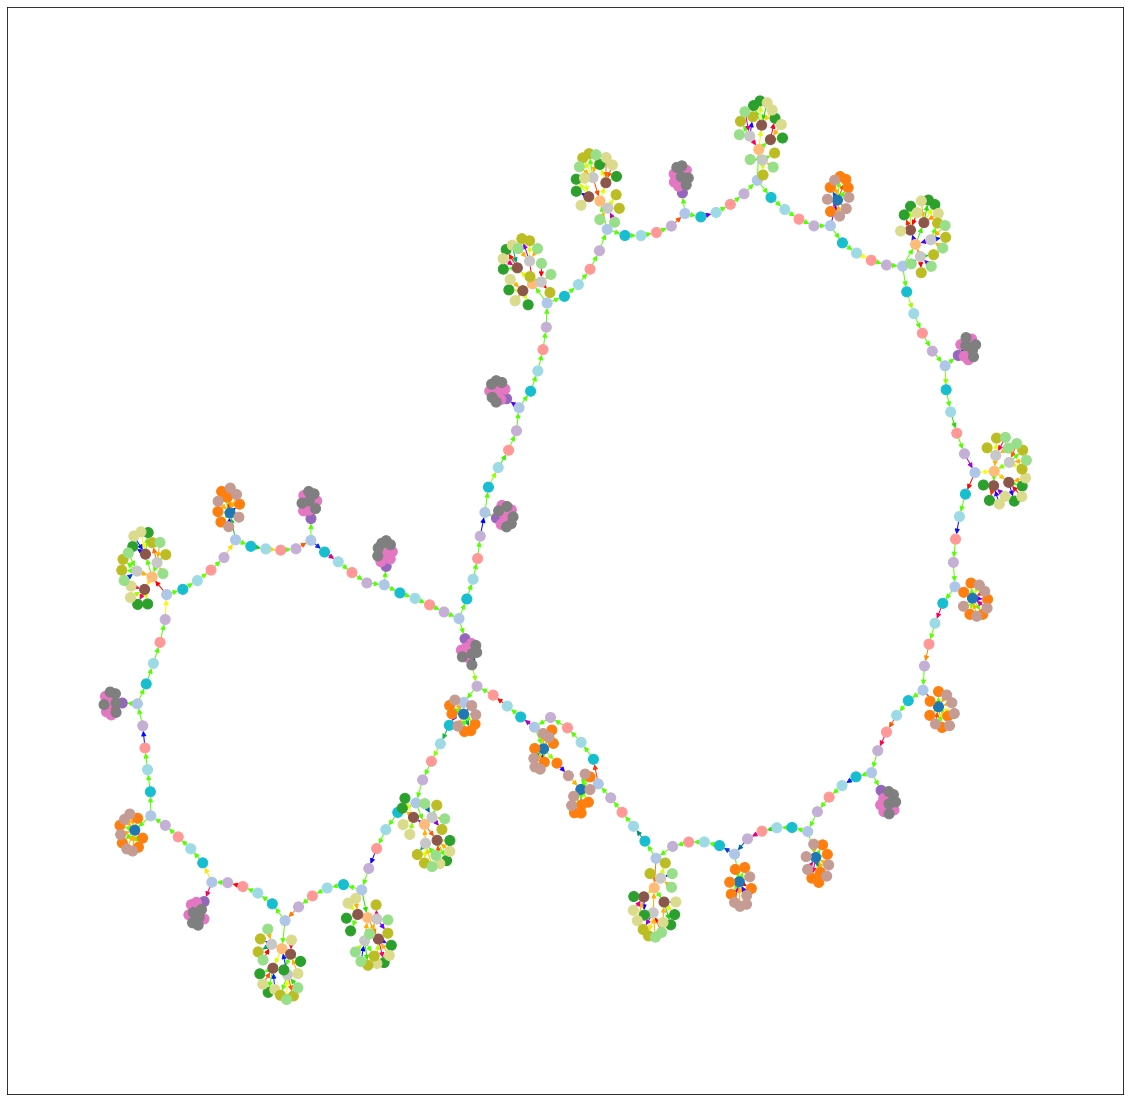

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-04-29 20:12:56.488111: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import networkx as nx
from graphcase_experiments.experiments.ring_exp import ring_exp

G = nx.read_gpickle('graphcase_experiments/graphs/sampled_ring_graphs/fraction0.6_delta0.6_seed10.pickle')
embed, G, tbl, res = ring_exp(execute_grid_search=True, G=G)

print(f"result on clustering {res['clustering']['ami']}, result on classification{res['classification']['f1_macro']}")
